In [1]:
!pip install -U -q pandas==2.2.1

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/air-pollution-in-seoul/AirPollutionSeoul/Measurement_summary.csv')
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [5]:
# Let's look at the total number of the variable 'Station code.'
df['Station code'].unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125])

In [6]:
set(df['Station code'])

{101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125}

# Select and prepare data

In [7]:
list_stations = [111, 112, 113, 114, 115, 116, 117, 118]
df_select = df[df['Station code'].isin(list_stations)]
df_select.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
259000,2017-01-01 00:00,111,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",37.606719,127.027279,0.005,0.047,0.002,0.9,62.0,38.0
259001,2017-01-01 01:00,111,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",37.606719,127.027279,0.005,0.046,0.002,0.9,61.0,38.0
259002,2017-01-01 02:00,111,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",37.606719,127.027279,0.004,0.043,0.002,0.9,57.0,43.0
259003,2017-01-01 03:00,111,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",37.606719,127.027279,0.004,0.042,0.002,0.9,54.0,45.0
259004,2017-01-01 04:00,111,"70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...",37.606719,127.027279,0.004,0.044,0.002,1.0,48.0,43.0


The retrieved dataset is not ready to be plotted. Some columns are needed to be created or modified before use.

In [8]:
## crete year_month, year and month columns
year_month = [i[0:7] for i in list(df_select['Measurement date'])]
df_select['year_month'] = year_month
df_select['year'] = [i[0:4] for i in year_month]
df_select['month'] = [i[-2:] for i in year_month]

## create district name column
district = [i.split(', ')[2] for i in df_select['Address']]
df_select['District'] = district

## change Station code column type
df_select = df_select.astype({'Station code': str})

## groupby with location and point of time
df_month = df_select.groupby(['Station code','District',
                              'year_month','year','month']).mean(numeric_only=True)
df_month.reset_index(inplace=True)
df_month.head()

/tmp/ipykernel_18/2483015565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['year_month'] = year_month
/tmp/ipykernel_18/2483015565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['year'] = [i[0:4] for i in year_month]
/tmp/ipykernel_18/2483015565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Station code,District,year_month,year,month,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,111,Seongbuk-gu,2017-01,2017,01,37.606719,127.027279,0.000723,0.034485,0.008324,0.818414,52.692204,29.119624
1,111,Seongbuk-gu,2017-02,2017,02,37.606719,127.027279,0.004555,0.039882,0.016192,0.769643,48.547619,28.212798
2,111,Seongbuk-gu,2017-03,2017,03,37.606719,127.027279,0.003972,0.043266,0.024465,0.640726,58.801075,44.689516
3,111,Seongbuk-gu,2017-04,2017,04,37.606719,127.027279,0.004025,0.036376,0.030214,0.655278,57.870833,26.654167
4,111,Seongbuk-gu,2017-05,2017,05,37.606719,127.027279,0.004812,0.031690,0.036022,0.528091,70.404570,26.701613


Here comes an important step. The main idea of this article is to create visualizations for ranking data. Next, we will create a column for ranking the districts' CO number (ppm) during each time point.

In [9]:
keep = []
for i in list(set(df_month['year_month'])):
    df = df_month[df_month['year_month']==i]
    order = df['CO'].rank(ascending=0)
    df['rank'] = [int(i) for i in order]
    keep.append(df)
    
df_month = pd.concat(keep)
df_month.sort_values(['year_month', 'Station code'], ascending=True,
                     inplace=True, ignore_index=True)
df_month.head()

/tmp/ipykernel_18/1017631764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = [int(i) for i in order]
/tmp/ipykernel_18/1017631764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = [int(i) for i in order]
/tmp/ipykernel_18/1017631764.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,Station code,District,year_month,year,month,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,rank
0,111,Seongbuk-gu,2017-01,2017,01,37.606719,127.027279,0.000723,0.034485,0.008324,0.818414,52.692204,29.119624,2
1,112,Gangbuk-gu,2017-01,2017,01,37.647930,127.011952,0.004897,0.029210,0.019047,0.620027,45.635753,31.387097,7
2,113,Dobong-gu,2017-01,2017,01,37.654192,127.029088,-0.011181,0.015156,0.000035,1.061290,53.978495,29.938172,1
3,114,Nowon-gu,2017-01,2017,01,37.658774,127.068505,0.004954,0.037770,0.015703,0.805914,51.168011,34.849462,3
4,115,Yangcheon-gu,2017-01,2017,01,37.525939,126.856603,0.005421,0.035552,0.009581,0.744086,52.951613,31.306452,4


In [10]:
#extract color palette, the palette can be changed
list_dist = list(set(df_select['District']))
pal = list(sns.color_palette(palette='Spectral',
                             n_colors=len(list_dist)).as_hex())
dict_color = dict(zip(list_dist, pal))

In [11]:
import plotly.express as px
fig = px.bar(df_month, x='District', y='CO',
             color='District', text='rank',
             color_discrete_map= dict_color,
             animation_frame='year_month',
             animation_group='Station code',
             range_y=[0,1.2],
             labels={ 'CO': 'CO (ppm)'},
            )
fig.update_layout(width=1000, height=600, showlegend=False,
                  xaxis = dict(tickmode = 'linear', dtick = 1))
fig.update_traces(textfont_size=16, textangle=0)
fig.show()

**Racing with an Animated scatter plot**

Now let's change the point of view by moving each district according to its rank at different points in time. The sizes of the scatter dots can be used to show the CO number.

To facilitate plotting with Plotly, we need to add two more columns to the DataFrame, position on the X-axis, and text for annotation.

In [12]:
ym=list(set(year_month))
ym.sort()

df_month['posi']=[ym.index(i) for i in df_month['year_month']]
df_month['CO_str']=[str(round(i,2)) for i in df_month['CO']]
df_month['CO_text']=[str(round(i,2))+' ppm' for i in df_month['CO']]
df_month.head()

,Station code,District,year_month,year,month,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,rank,posi,CO_str,CO_text
0,111,Seongbuk-gu,2017-01,2017,01,37.606719,127.027279,0.000723,0.034485,0.008324,0.818414,52.692204,29.119624,2,0,0.82,0.82 ppm
1,112,Gangbuk-gu,2017-01,2017,01,37.647930,127.011952,0.004897,0.029210,0.019047,0.620027,45.635753,31.387097,7,0,0.62,0.62 ppm
2,113,Dobong-gu,2017-01,2017,01,37.654192,127.029088,-0.011181,0.015156,0.000035,1.061290,53.978495,29.938172,1,0,1.06,1.06 ppm
3,114,Nowon-gu,2017-01,2017,01,37.658774,127.068505,0.004954,0.037770,0.015703,0.805914,51.168011,34.849462,3,0,0.81,0.81 ppm
4,115,Yangcheon-gu,2017-01,2017,01,37.525939,126.856603,0.005421,0.035552,0.009581,0.744086,52.951613,31.306452,4,0,0.74,0.74 ppm


Next, plot an animated scatter plot

In [13]:
import plotly.express as px
fig = px.scatter(df_month, x='posi', y='rank',
                 size= 'CO',
                 color='District', text='CO_text',
                 color_discrete_map= dict_color,
                 animation_frame='year_month',
                 animation_group='District',
                 range_x=[-2,len(ym)],
                 range_y=[0.5,6.5]
                )
fig.update_xaxes(title='', visible=False)
fig.update_yaxes(autorange='reversed', title='Rank',
                 visible=True, showticklabels=True)
fig.update_layout(xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=True))
fig.update_traces(textposition='middle left')
fig.show()

**Chart**

Animated charts are normally limited by being able to express one point in time. To show multiple time points, some charts and methods can be applied to exhibit many time points at once.

**Drawing lines with a Bump chart**

Basically, a bump chart applies multiple lines to show the changes in ranking over time. Plotting a bump chart with Plotly allows users to filter the result and provide more information when hovering the cursor over each data point, as shown in the result below.

In [14]:
fig=px.line(df_month,x='year_month',y='rank',
           color='District',
           color_discrete_map=dict_color,
           markers=True,
           hover_name='CO_text')
fig.update_traces(marker=dict(size=11))
fig.update_yaxes(autorange='reversed',title='Rank',
                visible=True,showticklabels=True)
fig.update_xaxes(title='',visible=True,showticklabels=True)
fig.update_layout(xaxis=dict(showgrid=False),
                 yaxis=dict(showgrid=False))
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Creating a photo collage of bar charts**

A simple bar chart can express ranking at a time point. With many time points, we can create many bar charts and then combine them into a photo collage. Start with using the Seaborn library to create a bar chart.


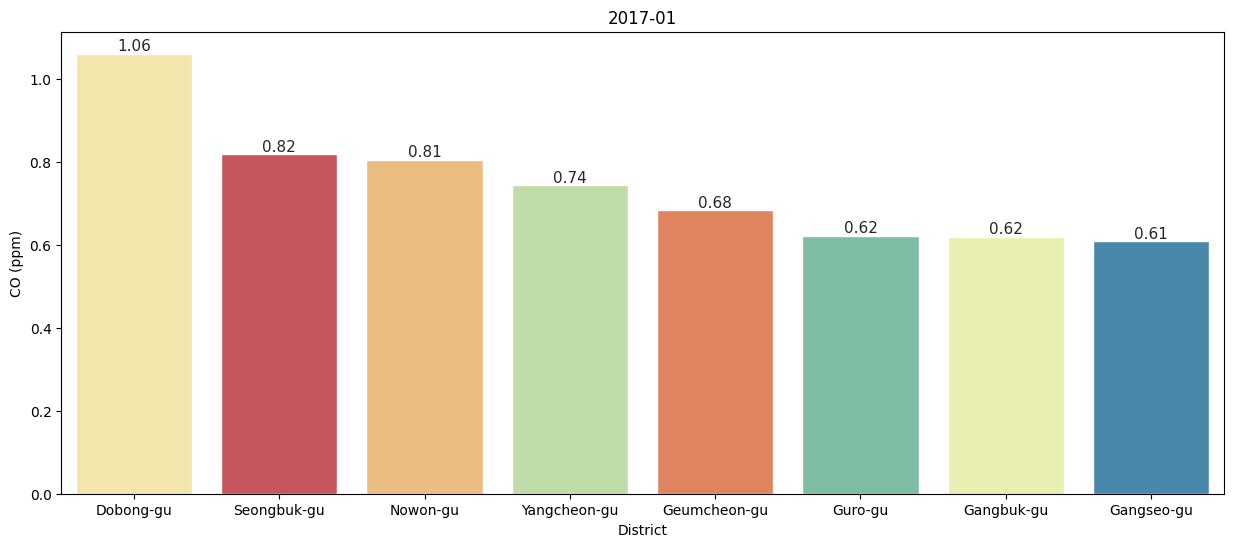

In [15]:
df_select = df_month[df_month['year_month']=='2017-01']
fig, ax = plt.subplots(figsize=(15, 6))

sns.set_style('darkgrid')
sns.barplot(data = df_select,
            x = 'District', y ='CO',
            order=df_select.sort_values('CO', ascending=False)['District'],
            palette=dict_color)
ax.bar_label(ax.containers[0],
             labels=df_select.sort_values('CO', ascending=False)['CO_str'],
             label_type='edge', size=11)
plt.ylabel('CO (ppm)')
plt.title('2017-01')
plt.show()